In [2]:
import scanpy as sc

import sys
sys.path.append("../")

## Example 3: Infer Copy Number Variation

In [3]:
import echidna as ec
ec.pl.activate_plot_settings()
%load_ext autoreload
%autoreload 2

/opt/homebrew/anaconda3/envs/echidna/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


The following file contains data from a previous training run. The functions in this tutorial will rely on the model saves referenced in this file to perform learning and inference of CNV. See the first tutorial for further details.

In [4]:
adata = sc.read_h5ad("data/F01_echidna.h5")

To infer copy number variation, Echinda relies on positional information of genes on cytobands with a Gaussian Hidden Markov Model. In the default setting, Echinda calls a pre-configured genome with mappings of genes to bands using the UCSC hg38 database. Later in the tutorial, we will see guidelines to use your own genome, if needed.

In [4]:
ec.tl.infer_cnv(adata)

2024-07-23 00:04:31,168 | INFO : `genome` not set, defaulting to hg38cytoBands and wgEncodeGencodeCompV46.
2024-07-23 00:04:40,268 | INFO : Added `.uns['echidna']['save_data']['infer_cnv']` : Path to CNV inference results.


Plot amplifications (red), deletions (blue), and no change (gray) in bands for a given cluster:

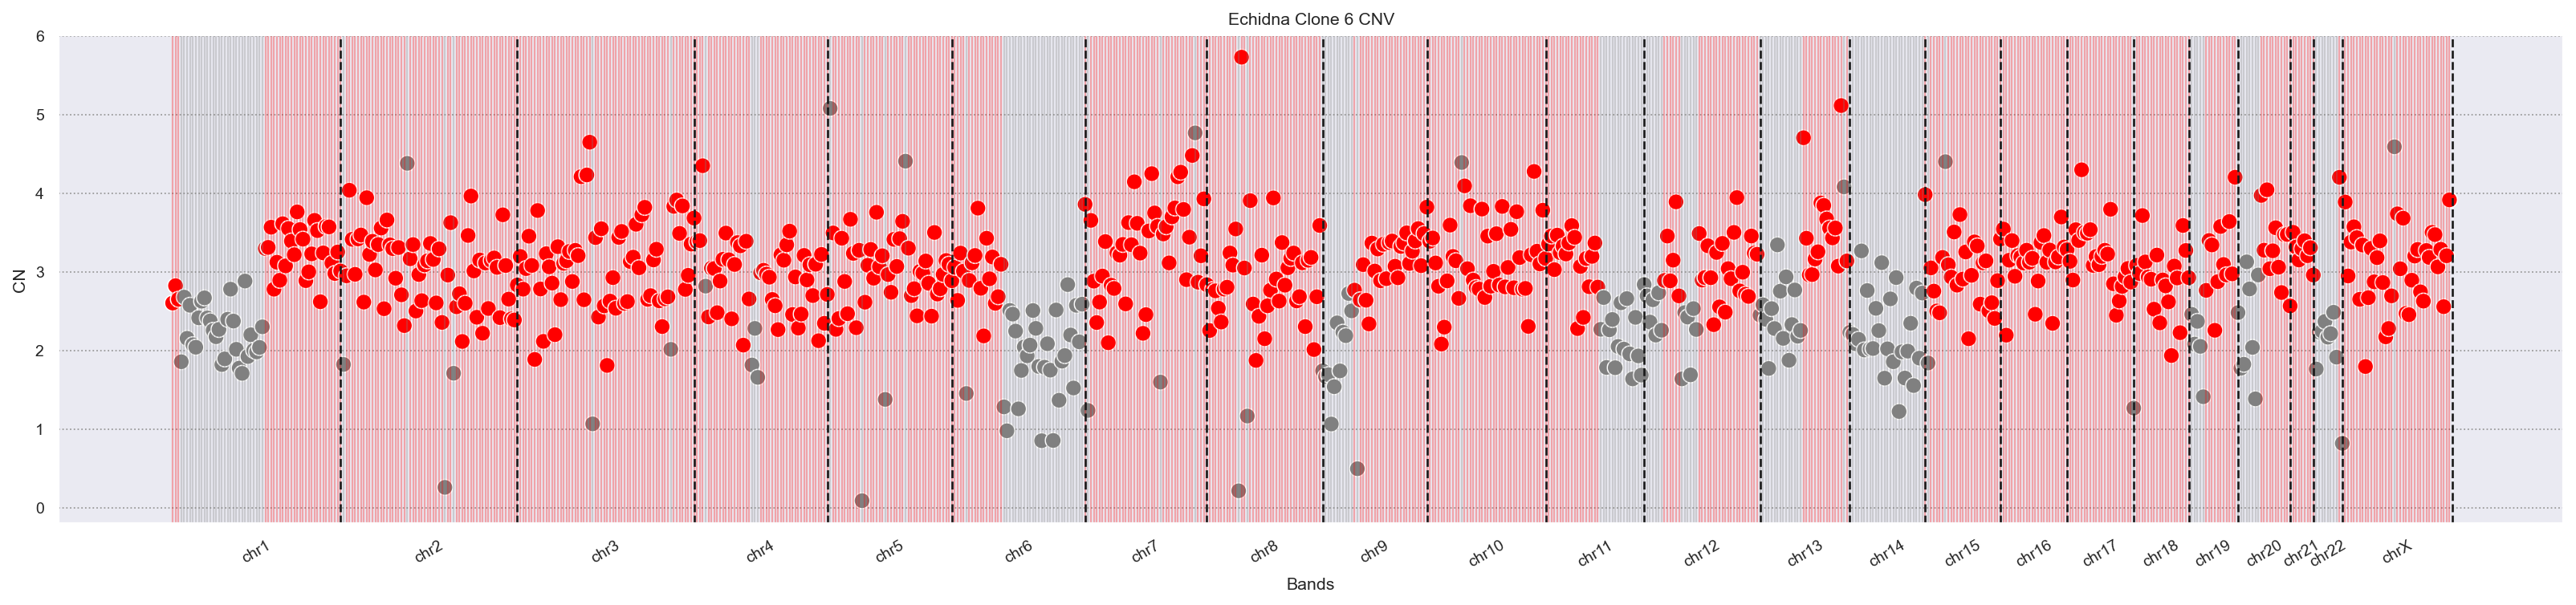

In [6]:
ec.pl.plot_cnv(adata, 6)

The underlying results can be fetched from the `adata` object:

In [5]:
ec.tl.cnv_results(adata)

band  echidna_clone_0  echidna_clone_1  echidna_clone_2  \
0    chr1_p36.33         2.601629         2.558075         2.589027   
1    chr1_p36.32         2.712525         2.665518         2.796817   
2    chr1_p36.31         2.598412         2.509377         2.553478   
3    chr1_p36.23         1.959608         1.635827         1.750635   
4    chr1_p36.22         2.761597         2.604065         2.673206   
..           ...              ...              ...              ...   
782   chrX_q26.3         3.033074         3.097640         3.479925   
783   chrX_q27.1         3.205373         3.533897         3.561919   
784   chrX_q27.2         2.072891         2.855528         2.959295   
785   chrX_q27.3         3.011093         3.245629         3.367988   
786     chrX_q28         3.656977         3.829013         3.955782   

     echidna_clone_3  echidna_clone_4  echidna_clone_5  echidna_clone_6  \
0           2.750550         3.040550         2.783466         2.602011   
1           2.844285         3.498840         2.992033         2.822760   
2           2.829283         2.965455         2.781002         2.650155   
3           2.132143         2.239333         2.242415         1.855397   
4           3.069657         3.055904         2.850054         2.677567   
..               ...              ...              ...              ...   
782         2.874426         4.361645         2.795911         3.062239   
783         2.821784         4.472618         2.785505         3.285987   
784         1.980527         4.117316         1.800465         2.555935   
785         2.472205         4.536434         2.631947         3.203566   
786         3.251374         4.933102         3.165340         3.914520   

     echidna_clone_7  echidna_clone_8  ...  states_echidna_clone_2  \
0           2.754914         3.975072  ...                    neut   
1           2.818054         3.979537  ...                    neut   
2           2.639488         3.890105  ...                    neut   
3           1.871783         3.627991  ...                    neut   
4           2.786522         3.509663  ...                    neut   
..               ...              ...  ...                     ...   
782         3.158476         3.000000  ...                     amp   
783         2.874331         4.510514  ...                     amp   
784         2.518632         3.284887  ...                     amp   
785         3.120409         2.893515  ...                     amp   
786         3.715441         3.993187  ...                     amp   

     states_echidna_clone_3  states_echidna_clone_4 states_echidna_clone_5  \
0                       del                    neut                    amp   
1                       del                    neut                    amp   
2                       del                    neut                    amp   
3                       del                    neut                    amp   
4                       del                    neut                    amp   
..                      ...                     ...                    ...   
782                     del                     amp                    amp   
783                     del                     amp                    amp   
784                     del                     amp                   neut   
785                     del                     amp                    amp   
786                     del                     amp                    amp   

    states_echidna_clone_6 states_echidna_clone_7 states_echidna_clone_8  \
0                      amp                   neut                    amp   
1                      amp                   neut                    amp   
2                      amp                   neut                    amp   
3                     neut                   neut                    amp   
4                     neut                   neut                    amp   
..                     .

### Using your own genome

In [6]:
import pandas as pd

These two datasets are from the UCSC hg38 database, they contain band coordinates and gene coordinates, respectively. You can use whatever genome data you prefer, as long as they are labeled as the seven columns below. `ec.tl.genes_to_bands` makes the mapping of genes to bands, and saves a weight according to the amount of overlap with the band (if a gene straddles band).

In [7]:
bands = pd.read_csv(
    "https://hgdownload.soe.ucsc.edu/goldenPath/hg38/database/cytoBand.txt.gz",
    delimiter="\t",
    header=None,
    names=["chrom", "bandStart", "bandEnd", "band", "g"],
).dropna()
genes = pd.read_csv(
    "https://hgdownload.soe.ucsc.edu/goldenPath/hg38/database/wgEncodeGencodeCompV46.txt.gz",
    delimiter="\t",
    header=None,
    names=["gene_id", "transcript_id", "chrom", "strand", "txStart", "txEnd", "cdsStart", "cdsEnd", "exonCount", "exonStarts", "exonEnds", "score", "geneName", "cdsStartStat", "cdsEndStat", "exonFrames"],
)
genome = ec.tl.genes_to_bands(genes, bands)

The result is saved at the following link, which Echidna reads in the default setting. Make sure to match your DataFrame's column names to the list below. Echidna uses these columns in `ec.tl.genes_to_bands` and `ec.tl.infer_cnv`:

`["chrom", "bandStart", "bandEnd", "band", "txStart", "txEnd", "geneName"]`

In [8]:
pd.read_csv("https://web.cs.ucla.edu/~wob/data/GRCh38_cytoband_gencodeV46.csv")

chrom         band  bandStart   bandEnd         geneName   txStart  \
0      chr1  chr1_p36.33          0   2300000          DDX11L2     11868   
1      chr1  chr1_p36.33          0   2300000        MIR6859-1     17368   
2      chr1  chr1_p36.33          0   2300000      MIR1302-2HG     29553   
3      chr1  chr1_p36.33          0   2300000        MIR1302-2     30365   
4      chr1  chr1_p36.33          0   2300000          FAM138A     34553   
...     ...          ...        ...       ...              ...       ...   
47971  chrY     chrY_q12   26600000  57227415            VAMP7  57067864   
47972  chrY     chrY_q12   26600000  57227415             IL9R  57184215   
47973  chrY     chrY_q12   26600000  57227415  ENSG00000292369  57190737   
47974  chrY     chrY_q12   26600000  57227415           WASIR1  57201142   
47975  chrY     chrY_q12   26600000  57227415           WASH6P  57207345   

          txEnd  weight  
0         14409     1.0  
1         17436     1.0  
2         31097     1.0  
3         30503     1.0  
4         36081     1.0  
...         ...     ...  
47971  57130289     1.0  
47972  57197337     1.0  
47973  57208756     1.0  
47974  57203357     1.0  
47975  57208935     1.0  

[47976 rows x 8 columns]

In [9]:
ec.tl.infer_cnv(adata, genome=genome)

2024-07-19 00:20:13,895 | INFO : Added `.uns['echidna']['save_data']['infer_cnv']` : Path to CNV inference results.


If we don't specify a cluster, `plot_cnv` will create a plot containing the amplifications/deletions of all clusters. Any plot in Echinda can be saved if parameter `filename` is passed.

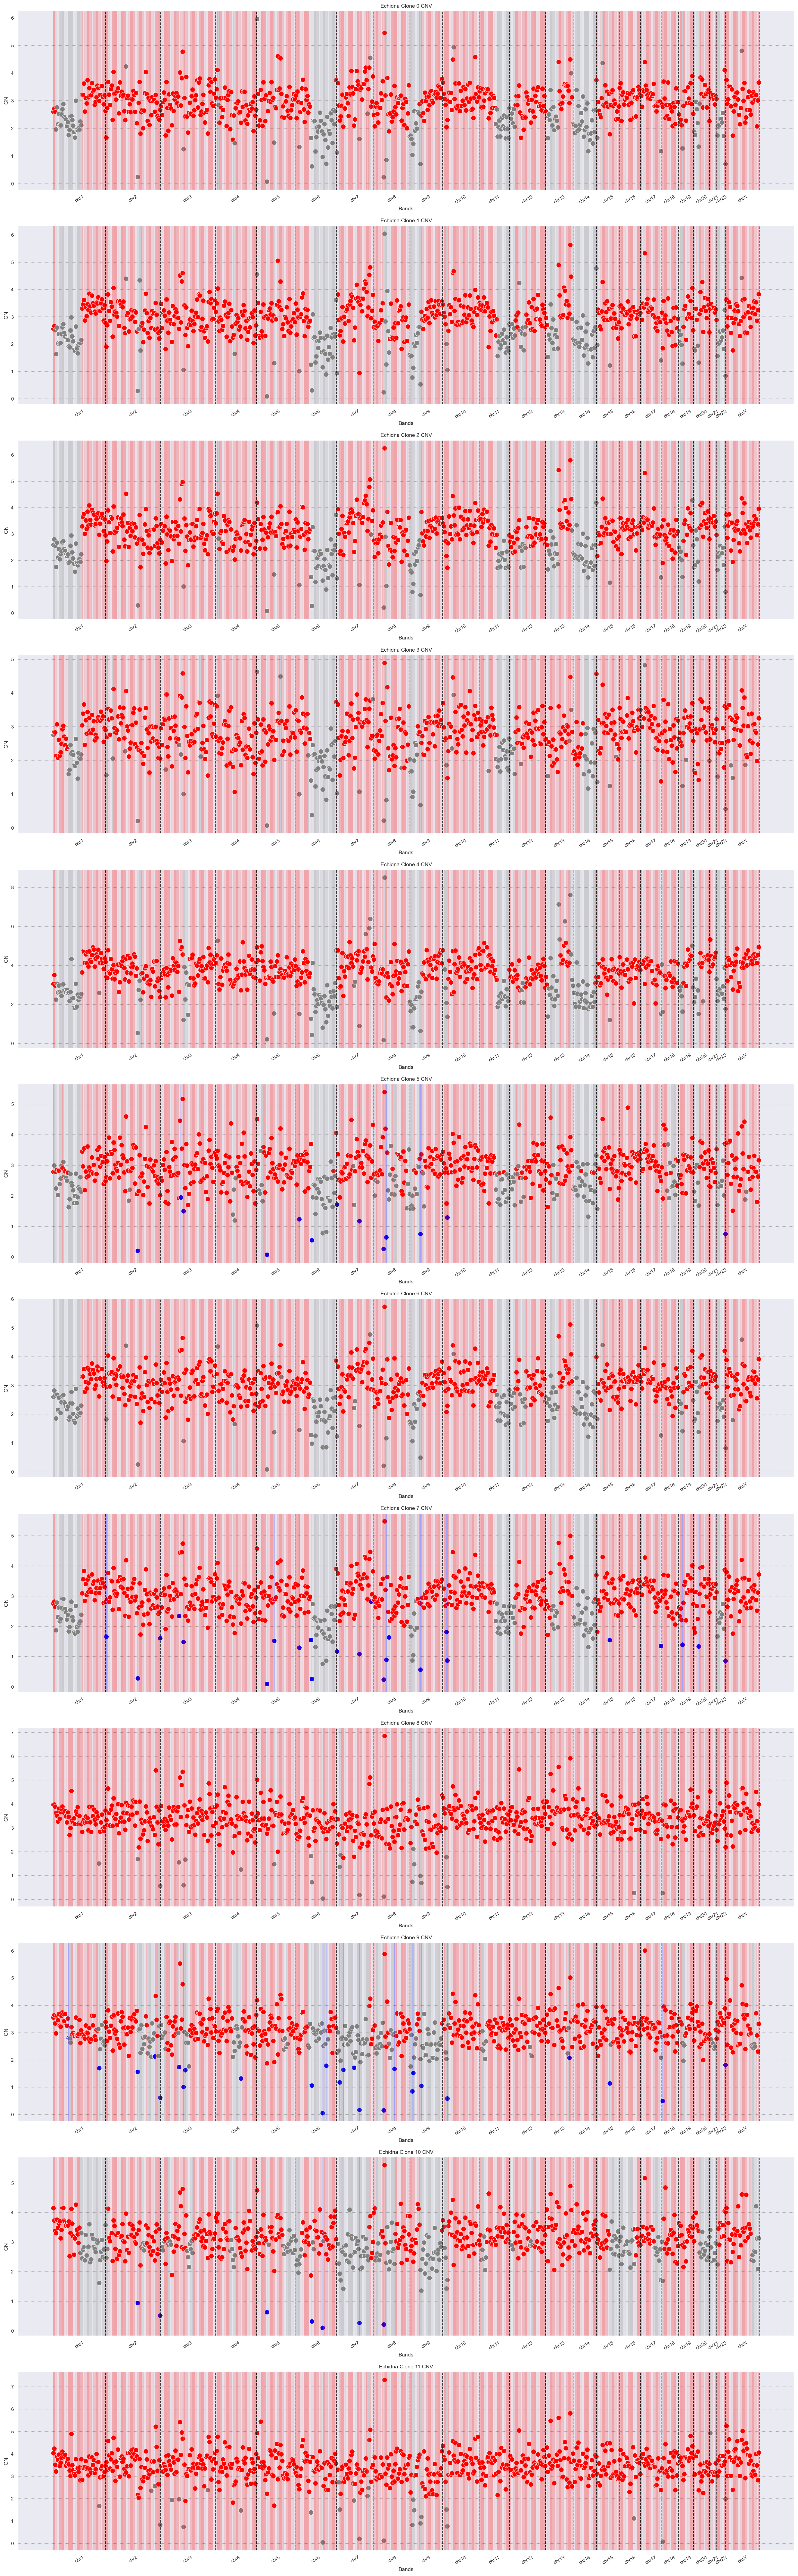

In [22]:
ec.pl.plot_cnv(adata)